<a href="https://colab.research.google.com/github/lee1201zxc/study/blob/main/AI/ML/Linear_Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN회귀의 문제점과 선형 회귀
수치를 예측하는 문제, 가장 가까운 k개 이웃 찾고 그들의 평균으로 수치 예측

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

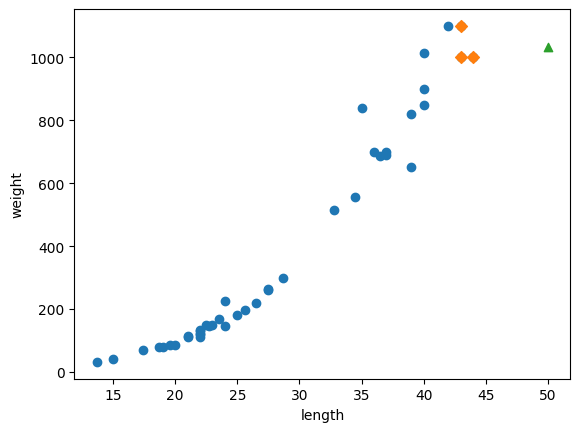

In [15]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

train_input,test_input,train_target,test_target = train_test_split(perch_length,perch_weight, random_state=42,test_size=0.25)
# 사이킷런 훈련 세트는 2차원 배열이어야해서 바꿔야함, 현재는 1차원임
# reshape -1->자동으로 계산
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)


knr= KNeighborsRegressor()
knr.n_neighbors = 3
knr.fit(train_input,train_target)
distance, indexes = knr.kneighbors([[50]])
plt.scatter(train_input,train_target)
plt.scatter(train_input[indexes],train_target[indexes],marker='D')

"""
k-최근접 이웃 회귀의 문제점 : 새로운 샘플이 훈련 세트의 범위를 벗어나면 엉뚱한 값 예측 가능
"""
plt.scatter(50,1033,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 선형 회귀

[1241.83860323]
[39.01714496] -709.0186449535477


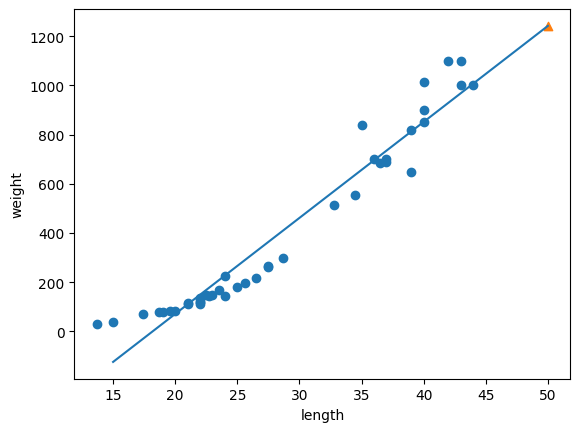

In [14]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

lr.fit(train_input, train_target)

print(lr.predict([[50]]))
# coef_ -> 기울기, intercept_ -> 절편
print(lr.coef_, lr.intercept_)

plt.scatter(train_input, train_target)
# 1차 방정식 그리기, [x 좌표],[y 좌표](2차 행렬이라 생각)
plt.plot([15,50],[15*lr.coef_+lr.intercept_,50*lr.coef_+lr.intercept_])
plt.scatter(50,1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

"""
knn 회귀보다는 정확하나 문제가 있음, 정확한 값을 예측하려면 곡선이 필요.
"""

## 다항 회귀
다항식을 사용한 선형 회귀
1차 방정식이용한 것보다 정확함

(42, 2) (14, 2)
[  1.01433211 -21.55792498] 116.0502107827827


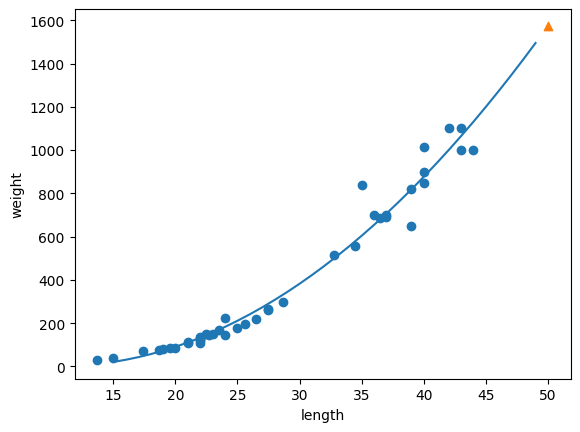

0.9706807451768623
0.9775935108325122


In [29]:
# 2차 방정식 구하는 모델 만들기 위해 x^2값 생성
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

print(train_poly.shape, test_poly.shape)
lr=LinearRegression()

# train_poly(x)는 2차원이나 특성 수가2임(선형 회구에선 1로줬음)
# 2차 방정식 y=a*x^2+b*x+c를 구하기 위해 x^2도 필요함
lr.fit(train_poly, train_target)
# a=1.01, b=-21.5, c=116
print(lr.coef_, lr.intercept_)

# 구간별 직선 그리기 위함
point= np.arange(15,50)
plt.scatter(train_input, train_target)
# 2차 방정식 그리기
plt.plot(point, point**2*lr.coef_[0]+point*lr.coef_[1]+lr.intercept_)
plt.scatter(50,1574, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

#아까 보다는 나은데 test점수가 더 높음(과소적합)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))